# HW6: Engineering Thermodynamics 

## Import Libraries

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


shape of measured and simulated data do not match.  

## Section 1/: Introduction 

This assignment will be deployed in week 5 - 6 of Q2 

This assignment consists of the following four parts:   
1. theoretical part; derivation of equations with final answer; (input from Anna in Latex form); 
2. material copper: model for C_V from data; at constant volume we have that C_V = C_P; 
3. somnething intermediate from Anna's work; 
4. molten glass from Celsian BV Eindhoven; 

## Section 2/: Model Development 

### Einstein and Debye models

Einstein developed in 1907 a model for the heat capacity at constant volume $C_V$ based on the following assumptions:
1. all atoms in a crystal vibrate independently of each other
2. these atoms vibrate with a single vibration frequency $w_e$
3. atoms are assumed to behave as harmonic oscillators

The energy states associated with the vibrational motions with frequency $w_e$ are given by:
\begin{equation}
\epsilon_n = (n + 1/2)hw_e
\end{equation}
where the quantum number $n$=0, 1, 2 etc, and $h$ is Planck constant. 

The partition function for a crystal of N atoms in the model of Einstein is given by:
\begin{equation}
Z(N, V, T) = \sum_{states~i}e^{-E_i(N, V)/kT}
\end{equation}

In this equation, the energy $E_i(N, V)$ is made of two components: a first contribution from the interaction energies $u$ of the atoms with each other which we write $E^{int}=Nu$, and a second contribution from the vibrational motions.

We can thus write the partition function as follows:
\begin{equation}
Z(N, V, T) = e^{-E^{int}(N, V)/kT}(\sum_{states~n}e^{-\epsilon_n/kT})^{3N} 
\end{equation}
or
\begin{equation}
Z(N, V, T) = e^{-E^{int}(N, V)/kT}(q_{vib})^{3N}
\end{equation}					
where $q_{vib}$ is the single particle vibrational function $q_{vib}=\sum_{n=0}^{n=\infty}e^{-\epsilon_n/kT}$

{\color{blue}{Derive the expression for the partition function of the crystal of N atoms as function of the Einstein vibrational temperature $\theta_E=hw_e/k$.
Show that the heat capacity in this model is given by:
\begin{equation}
C_V(\theta_{E})  =3Nkx^{2}\frac{e^{-x}}{[1-e^{-x}]^{2}},\;\;\: where\;x=\frac{\theta_{E}}{T}
\end{equation}}}

The limit of $C_V(\theta_{E})$ when T approaches zero is given by 
\begin{equation}
C_V(\theta_{E})  =3Nkx^{2}e^{-x}
\end{equation}
which leads to $C_V(\theta_{E})$ = 0 at 0 K in accordance with the third law of thermodynamics. However, it is observed experimentally that $C_V$ goes to zero as $T^3$ and not following an exponential decay. 

The approximation of atoms vibrating independently of each other is a crude one that leads to the discrepancies observed with the experiments. Debye developed in 1912 a model that accounts for collective lattice vibrations, and assumes a frequency distribution between 0 and a cut-off frequency $w_D$, with a frequency distribution between those two values given by $g(w) = \alpha w^2$. The corresponding heat capacity model is given by: 
\begin{equation}
C_V(\theta_{D})  =9Nk\left(\frac{T}{\theta_{D}}\right)^{3}\intop_{0}^{\,\,\, \theta_{D}/T}\frac{e^x x^{4}}{[e^x-1]^{2}} dx\;\;\: where\; x=\frac{\theta_{D}}{T}
\end{equation}

### Fitting Cu heat capacity data
You are given the molar heat capacity data at constant pressure $C_{p,m}$ of copper between ... and ... K. 

1. Why can we approximate the heat capacity at constant pressure $C_{p,m}$ with the heat capacity at constant volume $C_{V,m}$ in this case?

2. The Einstein temperature of Cu is $\theta_{E(Cu)} = $. Fit the data for Cu with the following Einstein model:
\begin{equation}
C_{V,m}(\theta_{E}) = 3Rx^{2}\frac{e^x}{[e^x-1]^{2}},\;\;\: x=\frac{\theta_{E}}{T} 
\end{equation}
Note the use of $R = N_{Av}k$ is this equation to fit molar heat capacity data. 
\\
3. When fitting such model to an unknown material, the characteristic Einstein temperature will need to be optimized too in the fitting process. Using a {\color{red}{Levenbergh Marquardt (or other)}}  iteration algorithm, derive the Einstein temperature yourself. 
\\
4. The Debye temperature of Cu is $\theta_{D(Cu)} = $. Fit the data for Cu with the following Debye model:
\begin{equation}
C_{V,m}(\theta_{D}) = 9R\left(\frac{T}{\theta_{D}}\right)^{3}\intop_{0}^{\,\,\, \theta_{D}/T}\frac{e^x x^{4}}{[e^x-1]^{2}} dx,\;\;\: x=\frac{\theta_{D}}{T} 
\end{equation}
\\
5. When fitting such model to an unknown material, the characteristic Debye temperature will need to be optimized too in the fitting process. Using a {\color{red}{Levenbergh Marquardt (or other)}}  iteration algorithm, derive the Debye temperature yourself. 

### Fitting heat capacity data of more complex materials

Fitting heat capacity data on materials with more than one chemical species cannot be done satisfactorily with an Einstein or Debye model alone as these do not capture the complexity of the lattice vibrations. One can fit with different models over certain temperature ranges. 

In the low-temperature region (below typically $T$ = 10-20 K), the lattice contribution can be modelled using an harmonic-lattice model \cite{2003Majzlan}, as given by equation (\ref{eq:harmonic_model}), where the number of required terms augments with the high temperature limit of the fit:
\begin{equation}
C_{latt}=\sum B_{n}T^{n},\;\;\;\; where\; n=3,5,7,9...
\label{eq:harmonic_model}
\end{equation}


The electronic contribution of the conduction electrons at the Fermi surface are expressed with a linear term $\gamma T$ \cite{1966Gopal}.

In the high-temperature region, the lattice contribution is modelled using a combination of Debye and Einstein functions \cite{2020Rosen}, as expressed in equation (\ref{eq:lattice_fitting}). The sum ($n_D + n_{E1} + n_{E2}$) should be close to the number of atoms in the formula unit. 

\begin{equation}
C_\textup{p,m}=n_{D}D(\theta_{D})+n_{E1}E(\theta_{E1})+n_{E2}E(\theta_{E2})
\label{eq:lattice_fitting}
\end{equation}
where $D(\theta_{D})$, $E(\theta_{E1})$ and $E(\theta_{E2})$ are the Debye and Einstein functions, respectively, as written in equations (\ref{eq:debye_eq}) and (\ref{eq:einstein_eq2}). $\theta_{D}$, $\theta_{E1}$, and $\theta_{E2}$ are the characteristic Debye and Einstein temperatures. $n_D$, $n_{E1}$, and $n_{E2}$  are adjustable parameters, whose sum ($n_D + n_{E1} + n_{E2}$) should be approximately equal to the number of atoms in the formula unit.
\begin{equation}
D(\theta_{D}) = 9R\left(\frac{T}{\theta_{D}}\right)^{3}\intop_{0}^{\,\,\, \theta_{D}/T}\frac{e^x x^{4}}{[e^x-1]^{2}} dx
\label{eq:debye_eq} 
\end{equation}

\begin{equation}
E(\theta_{E}) = 3Rx^{2}\frac{e^x}{[e^x-1]^{2}},\;\;\: x=\frac{\theta_{E}}{T} \label{eq:einstein_eq2} 
\end{equation}
where $R$ is the universal gas constant. 

1. You are given data for BaMoO$_4$. Fit the data below $T$ = 16 K using the harmonic lattice model as given by equation (\ref{eq:harmonic_model}).  The electronic specific heat of BaMoO$_4$ is zero, as could be expected for such an insulating material. 

2. Fit the data above $T$ = 16 K with a Debye and Einstein fit. What are the derived characteristic temperatures and sum ($n_D + n_{E1} + n_{E2}$)?

## Section 3:/ Copper 

The code that follows was taken from [notebook.community](https://notebook.community/hwagit/jupyter-notebooks/mod-phase-trans-metals-alloys/tmt4260_exercise1).

### Section 1.3:/ Forward Model and Measured Data  

In [57]:
# define gas constant 
R = 8.314472  # [J/(mol K)]
# define optimal theta value for copper for Einstein model 
theta_ECu = 244  # [K]
# define optimal theta value for copper for Debye model 
theta_DCu = 315  # [K]

# define integrand of the Debye model 
def debye_integrand(x):
    return x**4*(np.exp(x)/(np.exp(x) - 1)**2)

# define c_V as a function of vector T and scalar theta  
def heat_capacity(T, theta, model='debye'):
    if model=='debye':
        C_V = [9*R*(i/theta)**3*scipy.integrate.quad(debye_integrand, 0, theta/i)[0] for i in T]
    else:
        C_V = [3*R*(theta/i)**2*(np.exp(theta/i)/(np.exp(theta/i) - 1)**2) for i in T]
    return C_V

In [58]:
# experimentally determined (T, C_V) values
C_V_exp = np.array([3.74, 6.14, 8.58, 10.83, 12.80, 14.49, 15.91, 18.11, 19.65, 20.78, 21.59,
                    22.23, 22.72, 23.07, 23.36, 23.58, 23.74, 24.02, 24.23, 24.44, 24.58,
                    24.70, 24.79, 24.87, 24.94, 25.03, 25.15, 25.30, 25.57, 25.98, 26.22,
                    26.80])
T_exp = np.array([40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280,
                  300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000, 1100, 1200,
                  1250, 1300])

# Declare T values from 20 to 400
T = np.linspace(20, 400, 400 - 20 + 1)
# asymptotic value for both the Einstein and Debye model for large values of T 
threeR = np.full(len(T), 3*R)

In [59]:
# modeled values of C_V using the einstein and Debye model 
C_V_E = heat_capacity(T, theta_ECu, model='einstein')
C_V_D = heat_capacity(T, theta_DCu)

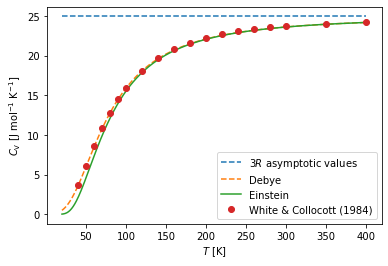

In [60]:
fig, ax = plt.subplots()
ax.plot(T, threeR, '--', label='$3R$ asymptotic values')
ax.plot(T, C_V_D, '--', label='Debye')
ax.plot(T, C_V_E, label='Einstein')
ax.plot(T_exp[:19], C_V_exp[:19], 'o', label='White & Collocott (1984)')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C_\mathrm{V}$ [J mol$^{-1}$ K$^{-1}$]')
ax.legend()

In [144]:
print(np.shape(C_V_E))

(381,)


### Section 2.3:/ Least-Squares Fit: Recovering listed values of theta 

In [134]:
# compute mismatch between model and data at time instance  
def mismatch(x, T, y):
    theta_Cu = x
    modeled_C_V = heat_capacity(T, theta_Cu) 
    mismatch_vec = np.array(modeled_C_V) - np.array(y).T
    mismatch_vec = mismatch_vec[:]
    mismatch_norm = np.linalg.norm(mismatch_vec)
    print("x = ", x, "norm =", mismatch_norm)
    return mismatch_vec

(4, 1)
x =  [315] norm = 15.111775947812259
(4, 1)


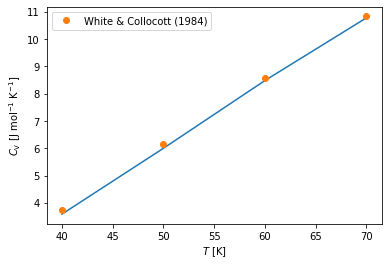

In [145]:
T_train = T_exp[:19]
y_train = C_V_exp[:19]
T_train = T_exp[:4]
y_train = C_V_exp[:4]

x0 = np.array([315])

y_modeled = heat_capacity(T_train, x0)

print(np.array(y_modeled).shape)

mismatch(x0, T_train, y_train)

fig, ax = plt.subplots()
ax.plot(T_train, y_modeled) 
ax.plot(T_train, y_train, 'o', label='White & Collocott (1984)')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C_\mathrm{V}$ [J mol$^{-1}$ K$^{-1}$]')
ax.legend()

print(np.shape(y_modeled))

In [136]:
T_train = T_exp[:19]
y_train = C_V_exp[:19]
T_train = T_exp[:4]
y_train = C_V_exp[:4]
x0 = np.array([315.])
modeled_C_V = heat_capacity(T_train, x0)
res = mismatch(x0, T_train, y_train)
res_lsq = scipy.optimize.least_squares(mismatch, x0, args=(T_train, y_train),verbose=2)
print(T_train)
print(y_train) 
print(modeled_C_V)
print(res)

x =  [315.] norm = 15.111775947812259
x =  [315.] norm = 15.111775947812259


ValueError: `fun` must return at most 1-d array_like. f0.shape: (4, 4)

In [137]:
x0 = np.array(315)
T_train = T_exp[:19] 
y_train = C_V_exp[:19]
# T_train = T_exp 
# y_train = C_V_exp
res_lsq = scipy.optimize.least_squares(mismatch, x0, args=(T_train, y_train),verbose=2)
x_opt = res_lsq.x 
print("optimal found = ", res_lsq.x)
x_opt = theta_ECu
y_opt = heat_capacity(T_train, x_opt)

fig, ax = plt.subplots()
ax.plot(T_train, y_opt) 
ax.plot(T_train, y_train, 'o', label='White & Collocott (1984)')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C_\mathrm{V}$ [J mol$^{-1}$ K$^{-1}$]')
ax.legend()

x =  [315.] norm = 172.63886288312645


ValueError: `fun` must return at most 1-d array_like. f0.shape: (19, 19)

## Section 4:/ More Complex Material 

## Section 5:/ Molten Glass  

## Conclusions

## References 

To be extended.

1. [wikki on Computational_thermodynamics](https://en.wikipedia.org/wiki/Computational_thermodynamics) : interesting for the links it provides; 
2. [wiki on Calphad](https://en.wikipedia.org/wiki/CALPHAD) 
3. [PyCalphad](https://pycalphad.org/docs/latest/)
4. [OpenCalphad](http://www.opencalphad.com)